In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

# helper to load data from PNG image files
import imageio

In [8]:
import glob

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:

# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

## 그림판 글씨 출력

***correct_label: 0
(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 129  54  52  46 150 237 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 100   0   0   0   0   0   0   0   0  38
  165 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 244   3   0   0   0   0   0   0   0   0   0   0
    0   8 245 255 255 255 255 255 255 255]
 [255 255 255 255 255 226   0   0   0   0 110 240 255 168  80  79   0   0
    0   0   0 241 255 255 255 255 255 255]
 [255 255 255 255 232   0   0   0   0 249 255 255 255 255 255 255 255 205
    8   0   0   1 255 255 255 255 255 255]
 [255 255 255 255   0   0   0  34 255 255 255 255 255 255 255 255 255 255
  255   8   0   0 184 255 255 255 255 255]
 [255 255 255 118   0   0  18 255 2

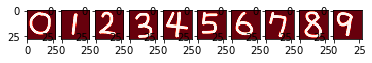

In [9]:
position = 1
for image_file_name in glob.glob('my_own_images/my_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    print(image_array.shape)
    print(image_array)
    
    image_data = 255.0 - image_array.reshape(784) #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
    
    matplotlib.pyplot.subplot(1,10,position)
    matplotlib.pyplot.imshow(image_array, cmap = 'Reds', interpolation = 'None')
    
    position += 1

## 종이 글씨 출력

***correct_label: 2
(28, 28)
[[182 183 181 181 180 179 179 178 178 178 178 178 178 177 177 177 177 176
  175 176 175 174 173 173 172 171 170 170]
 [183 182 181 181 179 179 178 177 178 177 178 179 179 178 178 177 176 175
  176 175 174 173 173 172 171 170 169 170]
 [181 181 180 179 179 178 178 177 178 179 179 178 178 177 178 178 177 176
  176 175 174 173 172 172 171 170 168 169]
 [182 180 181 179 179 178 178 178 178 179 178 179 179 178 177 178 177 175
  175 174 173 173 173 171 171 169 168 167]
 [181 181 180 180 180 180 179 178 178 179 179 179 179 178 179 177 176 176
  174 175 174 174 173 171 171 170 169 167]
 [181 180 179 179 179 178 177 177 178 177 178 177 179 178 176 176 177 176
  174 174 173 172 172 170 171 170 169 168]
 [180 181 179 179 179 178 178 177 177 177 177 180 185 186 181 177 176 175
  174 173 174 172 172 172 171 171 168 167]
 [179 179 179 178 178 178 177 176 177 177 183 175 110 102 151 188 176 175
  174 174 173 172 172 171 170 169 168 168]
 [180 179 178 178 177 176 177 176 1

***correct_label: 9
(28, 28)
[[185 185 184 185 184 183 182 182 182 184 187 187 186 185 183 179 178 176
  176 174 173 174 174 171 171 170 170 169]
 [185 185 184 185 184 183 184 186 192 171 136 112 114 123 145 177 186 178
  174 174 173 172 172 171 171 170 170 170]
 [186 185 184 184 184 183 192 161  92  58  64  71  79  65  57  48 105 183
  174 174 173 172 172 171 171 171 170 169]
 [186 185 185 184 184 194 124  65  67 116 170 191 188 185 170 121  50  93
  168 174 171 171 171 171 170 170 168 168]
 [186 186 185 183 193 110  72  86 172 190 182 179 179 178 178 184 182  55
   33 178 172 171 171 171 171 170 169 169]
 [185 185 184 186 171  71  87 190 183 180 178 179 178 179 176 175 188  62
   24 171 172 170 172 169 170 169 169 169]
 [185 184 184 187 146  67 141 189 180 180 179 178 178 177 176 182 170  51
   30 175 171 171 170 171 171 169 167 168]
 [186 184 183 185 175  70  73 185 188 184 183 183 183 186 183 142  67  47
   38 175 171 170 170 169 169 170 167 167]
 [185 185 183 183 191 134  61  65 1

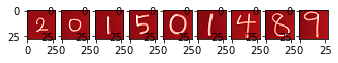

In [24]:
position = 1
for image_file_name in glob.glob('my_real_images/실?_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    print(image_array.shape)
    print(image_array)
    
    image_data = 255.0 - image_array.reshape(784) #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
    
    matplotlib.pyplot.subplot(1,10,position)
    matplotlib.pyplot.imshow(image_array, cmap = 'Reds', interpolation = 'None')
    
    position += 1

# 회전 추가

In [46]:
import scipy.ndimage


input_nodes = 784
hidden_nodes = 100
output_nodes = 10


learning_rate = 0.08



n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


epochs = 7

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values 
        #(all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        if e%3 <= 1 :
            
            ## create rotated variations
            # rotated anticlockwise by x degrees
            inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28),
                                                                   10, cval=0.01, reshape=False)
            n.train(inputs_plus10_img.reshape(784), targets)

            # rotated clockwise by x degrees
            inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28),
                                                                    -10, cval=0.01, reshape=False)
            n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    print("epochs ", e, " done")
pass

epochs  0  done
epochs  1  done
epochs  2  done
epochs  3  done
epochs  4  done
epochs  5  done
epochs  6  done


***correct_label: 0
network says  0
***correct_label: 1
network says  1
***correct_label: 2
network says  2
***correct_label: 3
network says  3
***correct_label: 4
network says  6
***correct_label: 5
network says  5
***correct_label: 6
network says  8
***correct_label: 7
network says  7
***correct_label: 8
network says  8
***correct_label: 9
network says  4
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
nodes =  100 epochs =  7 rate =  0.08 performance =  0.7


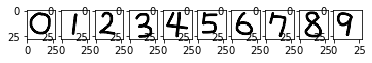

In [47]:
scorecard = []

position = 1
for image_file_name in glob.glob('my_own_images/my_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    
    image_data = 255.0 - image_array.reshape(784) 
    #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
        
    # query the network
    outputs = n.query(image_data)
        
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
        
    matplotlib.pyplot.subplot(1,10,position)
    matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', 
                             interpolation='None')
    position += 1;
    
    if (label == correct_label):
        #정답인 경우 성적표에 1을 더해 줌
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더해 줌
        scorecard.append(0)
        pass
    pass

print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print("nodes = ", hidden_nodes, "epochs = ", epochs, 
      "rate = ", learning_rate, "performance = ", 
      scorecard_array.sum()/ scorecard_array.size)

# 종이 손글씨

***correct_label: 2
[[0.09629974]
 [0.02896778]
 [0.52163636]
 [0.17927734]
 [0.02227497]
 [0.00217143]
 [0.08205713]
 [0.01210937]
 [0.07944205]
 [0.01054853]]
network says  2
***correct_label: 0
[[0.45414246]
 [0.00997321]
 [0.11197541]
 [0.00708144]
 [0.01546925]
 [0.03530796]
 [0.1355832 ]
 [0.03782463]
 [0.01184503]
 [0.09012283]]
network says  0
***correct_label: 1
[[0.09613403]
 [0.02849855]
 [0.4845834 ]
 [0.16540661]
 [0.02118143]
 [0.0023107 ]
 [0.0788986 ]
 [0.01346615]
 [0.08058123]
 [0.01165447]]
network says  2
***correct_label: 5
[[7.31055482e-03]
 [6.01269562e-03]
 [2.27894867e-04]
 [2.92769382e-01]
 [4.26507946e-05]
 [5.27907138e-01]
 [2.24670880e-05]
 [3.39638788e-02]
 [4.87984103e-04]
 [1.27428024e-01]]
network says  5
***correct_label: 0
[[9.76909119e-01]
 [1.23944387e-03]
 [2.85772544e-04]
 [4.07899829e-05]
 [1.12232405e-03]
 [7.92034473e-03]
 [5.85333744e-03]
 [2.55238205e-03]
 [1.77850051e-02]
 [9.19982049e-04]]
network says  0
***correct_label: 1
[[0.03371391]
 

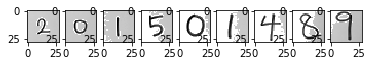

In [23]:
scorecard2 = []

position = 1
for image_file_name in glob.glob('my_real_images/실?_?.png'):
    correct_label = int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)    
    image_array = image_array[:,:,0] #***컬러를 그레이 스케일로 변환***
    
    image_data = 255.0 - image_array.reshape(784) 
    image_data = numpy.asfarray([x if x > 73 else 0 for x in image_data])
    #28x28 행렬 값을 784개 값의 리스트로 재구성
    image_data = (image_data / 255.0 * 0.99) + 0.01 #색상 값 반전
        
    # query the network
    outputs = n.query(image_data)
    print(outputs)
        
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
        
    matplotlib.pyplot.subplot(1,9,position)
    matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', 
                             interpolation='None')
    position += 1;
    
    if (label == correct_label):
        #정답인 경우 성적표에 1을 더해 줌
        scorecard2.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더해 줌
        scorecard2.append(0)
        pass
    pass

print(scorecard2)
scorecard2_array = numpy.asarray(scorecard2)
print("first nodes = ", hidden_nodes, 
      "rate = ", learning_rate, "performance = ", 
      scorecard2_array.sum()/ scorecard2_array.size)

#### 나만의 손글씨 인식률은 솔직하게 최악이었다.
#### 혹시나 모델을 잘못 만들었을 가능성을 배제할 수 없었기에 교재 저자의 깃에서 코드를 가져와 내 글씨로 테스트를 진행했다. 
#### 저자의 코드로 진행한 테스트 결과는 다음과 같다.
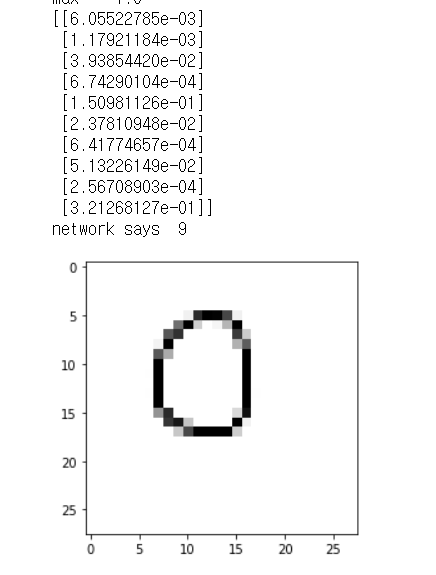
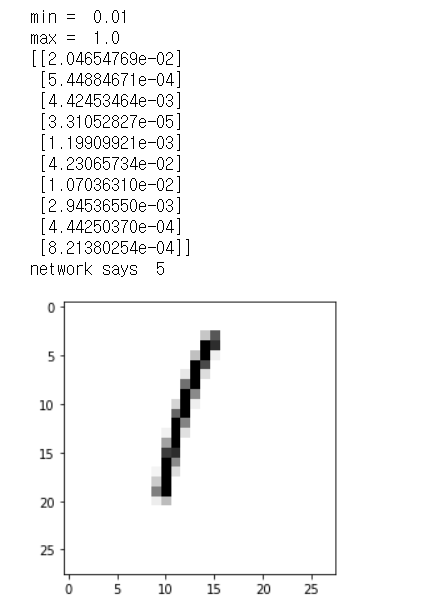
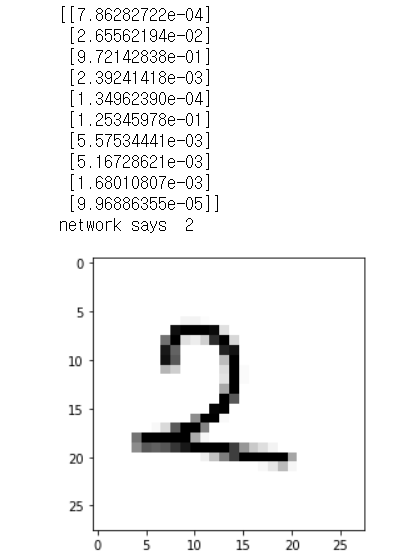
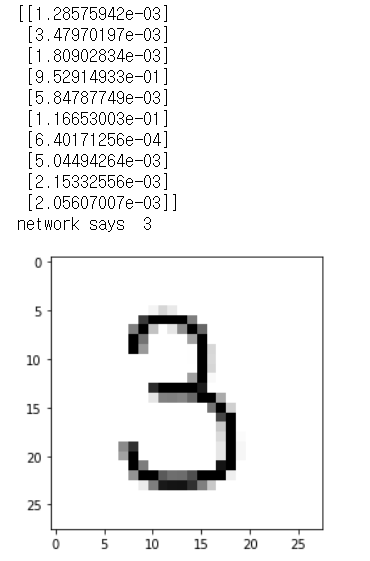
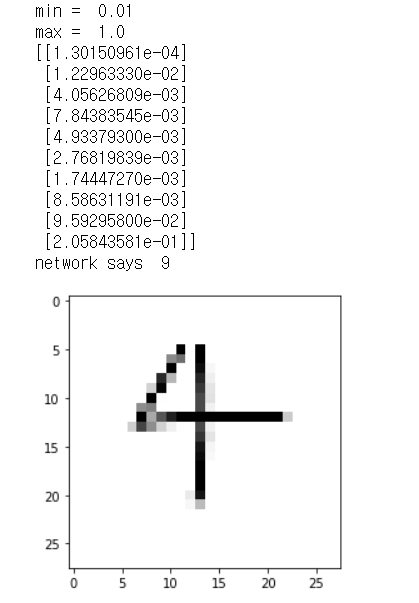
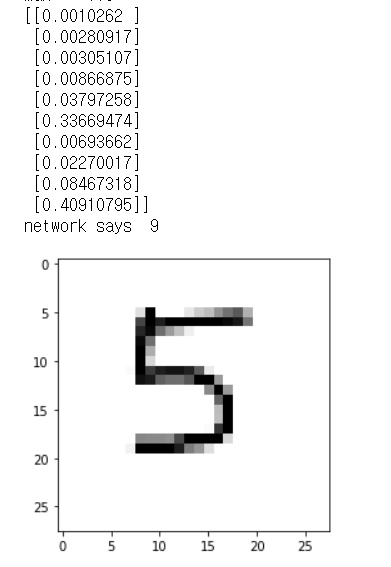
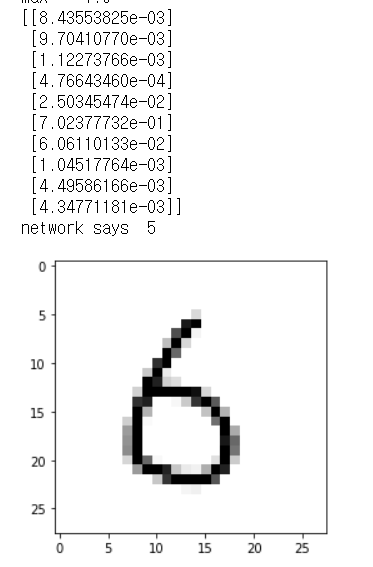
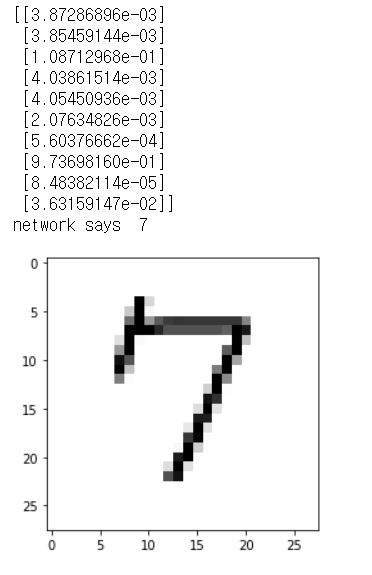
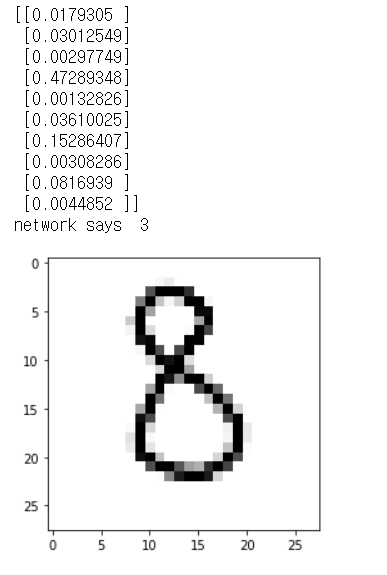
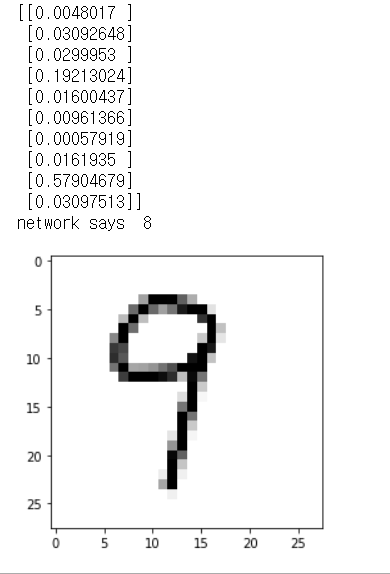

#### 제대로된 신경망임이 확실한 코드로 실행한 테스트의 결과 또한 내 신경망 모델의 결과처럼 심한 오답률을 보였으므로
#### 신경망 모델의 문제가 아닌 테스트 이미지 자체의 문제임을 확인했다.

#### 두번째로 추측한, 오답률에 영향을 끼친 요소는 트레이닝 데이터와 내 손글씨 데이터와의 형태 차이였다. 
#### 이에 손글씨 데이터 자체를 트레이닝 데이터의 모습과 비슷한 형태로 조작한 후 performance가 어떻게 달라지는지 비교해보았다.
#### 그 결과, 동일 조건에서 트레이닝 데이터와 비슷한 모양의 조작데이터의 학습률은 1에 가깝게 올라감을 확인할 수 있었다.

#### 하지만 위의 결과는 실제 손글씨가 아니며, 그저 테스트 데이터에 따라 학습률 차이가 크다는 것만을 증명해준 것에 불과하므로 
#### 손글씨를 다시 쓰되, 이번에는 손글씨의 굵기를 훨씬 더 굵게 바꾸었다. 
#### 그 결과로 학습률이 0.2~ 0.4를 벗어나지 못하던 초기 데이터보다 훨씬 나은 정확도를 결과로 뽑아내는 것을 위에서와 같이 확인할 수 있었다.

#### 그림판으로 그린 데이터의 테스트들은 학습률이 손글씨의 형태나 굵기의 정도에 따라서 크게 영향을 받음을 드러냈다.



#### 종이 그림의 경우에는 그림판 그림의 경우보다 더 상황이 좋지 못했다.
#### 사진으로 찍는 동안 배경과 그림자의 영향탓에 아예 모든 숫자를 틀리는 경우도 발생했기 때문이다.
#### 그림판 데이터를 테스트한 조건을 변경해보거나
#### 추가적으로 약식 전처리 과정을 더했다. 임계값에 따라 이진화를 하는 방식으로 추후에 고쳐도 좋을 것이다.

